In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Try using an alternative encoding
Aviation_df = pd.read_csv('AviationData.csv', encoding='latin1')

# Preview the first few rows to ensure the file loaded correctly
Aviation_df

c:\Users\maktr\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


##### Calculating Missing Data

In [242]:
# Calculate missing values per column
missing_data = Aviation_df.isnull().sum()

# Calculate the percentage of missing data for each column
missing_percentage = (missing_data / len(Aviation_df)) * 100

# Combine into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    "Missing Values": missing_data,
    "Percentage Missing (%)": missing_percentage
}).sort_values(by="Percentage Missing (%)", ascending=False)

# Display the summary
print("Summary of Missing Data:")
print(missing_summary)

Summary of Missing Data:
                        Missing Values  Percentage Missing (%)
Schedule                         76307               85.845268
Air.carrier                      72241               81.271023
FAR.Description                  56866               63.974170
Aircraft.Category                56602               63.677170
Longitude                        54516               61.330423
Latitude                         54507               61.320298
Airport.Code                     38640               43.469946
Airport.Name                     36099               40.611324
Broad.phase.of.flight            27165               30.560587
Publication.Date                 13771               15.492356
Total.Serious.Injuries           12510               14.073732
Total.Minor.Injuries             11933               13.424608
Total.Fatal.Injuries             11401               12.826109
Engine.Type                       7077                7.961615
Report.Status                 

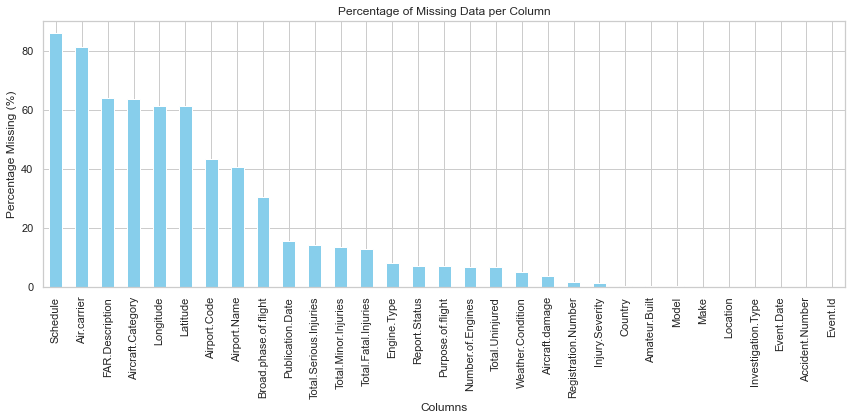

In [243]:
# Optional: Visualize missing data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
missing_summary["Percentage Missing (%)"].plot(kind='bar', color='skyblue')
plt.title("Percentage of Missing Data per Column")
plt.ylabel("Percentage Missing (%)")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Creation of new Column 'Total.Injured'

In [244]:
Aviation_df['Total.injured'] = Aviation_df['Total.Serious.Injuries'] +  Aviation_df['Total.Fatal.Injuries']



### **Step 1:** Total.Injured vs Total.Noninjured by Category (Sort by Total Number of Each)

### Engine.Type

In [245]:
# Group by 'Engine.Type' and calculate required statistics in one step
Engine_summary = Aviation_df.groupby('Engine.Type').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Uses=('Engine.Type', 'size')
)

# Calculate Injured and Non-injured Percentages
Engine_summary['Injured Percentage (%)'] = Engine_summary['Total_Injured'] / (Engine_summary['Total_Injured'] + Engine_summary['Total_Uninjured']) * 100
Engine_summary['Non-injured Percentage (%)'] = Engine_summary['Total_Uninjured'] / (Engine_summary['Total_Injured'] + Engine_summary['Total_Uninjured']) * 100

# Sort by 'Total_Uses'
sorted_Engine_summary = Engine_summary.sort_values('Total_Uses', ascending=False)

# Display top 10 results
sorted_Engine_summary.head(10)



,Total_Injured,Total_Uninjured,Total_Uses,Injured Percentage (%),Non-injured Percentage (%)
Engine.Type,,,,,
Reciprocating,32408.0,75246.0,69530,30.103851,69.896149
Turbo Shaft,2563.0,4858.0,3609,34.537124,65.462876
Turbo Prop,2670.0,16835.0,3391,13.688798,86.311202
Turbo Fan,5357.0,211048.0,2481,2.475451,97.524549
Unknown,4377.0,12794.0,2051,25.490653,74.509347
Turbo Jet,1014.0,34072.0,703,2.890042,97.109958
None,13.0,90.0,19,12.621359,87.378641
Geared Turbofan,0.0,121.0,12,0.000000,100.000000
Electric,3.0,7.0,10,30.000000,70.000000


### Analyzing Model Data

In [250]:
# Re-calculate the Model_summary based on the user's instructions
Model_summary = Aviation_df.groupby('Model').agg(
    Total_Injured=('Total.injured', 'mean'),
    Total_Uninjured=('Total.Uninjured', 'mean'),
    Total_Model=('Model', 'size')
)

# Calculate Injured and Non-injured Percentages
Model_summary[['Injured Percentage (%)', 'Non-injured Percentage (%)']] = (
    Model_summary[['Total_Injured', 'Total_Uninjured']]
    .div(Model_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1), axis=0) * 100
)

# Sort by 'Total_Model' and get top 20 models
top_20_models = Model_summary.sort_values('Total_Model', ascending=False).head(20)
top_20_models

,Total_Injured,Total_Uninjured,Total_Model,Injured Percentage (%),Non-injured Percentage (%)
Model,,,,,
152,0.254118,1.027379,2367,19.829749,80.170251
172,0.406811,1.313703,1756,23.644748,76.355252
172N,0.565762,1.228389,1164,31.533682,68.466318
PA-28-140,0.642946,0.982538,932,39.554142,60.445858
150,0.292208,0.947826,829,23.564501,76.435499
172M,0.563338,1.456117,798,27.895557,72.104443
172P,0.528897,1.296520,689,28.974018,71.025982
182,0.523411,1.320814,659,28.381099,71.618901
180,0.280669,1.642504,622,14.594064,85.405936


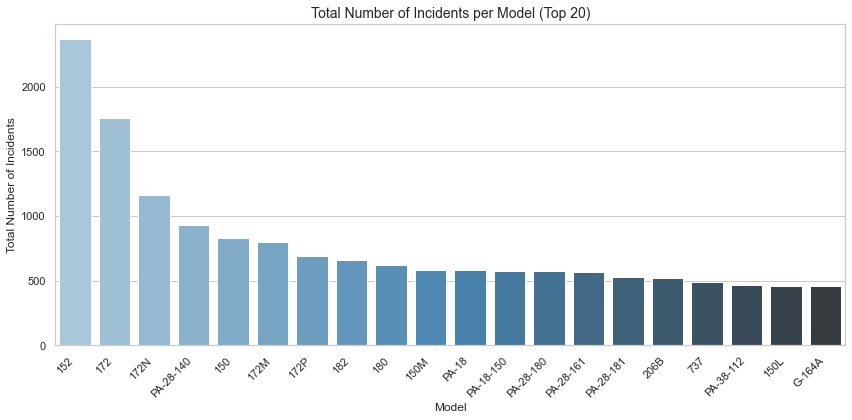

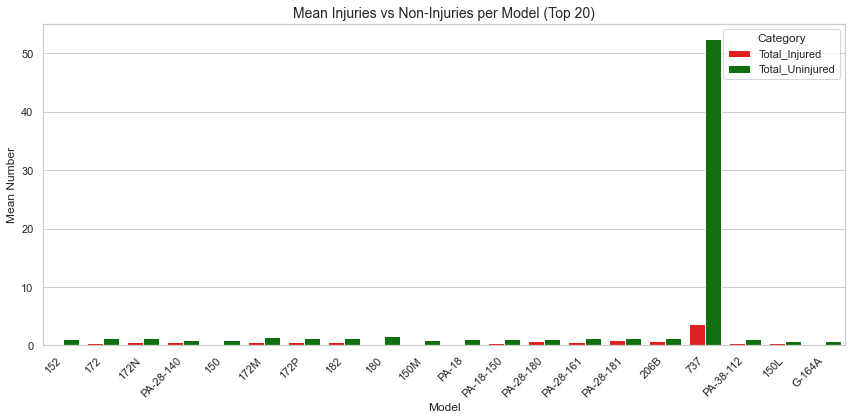

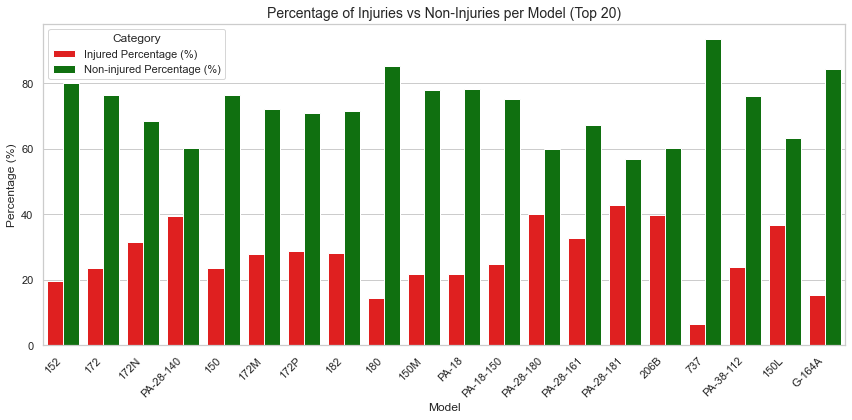

In [256]:
import seaborn as sns

# Bar Graph: Total Numbers of Each Model using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_models.index, y='Total_Model', data=top_20_models.reset_index(), palette='Blues_d')
plt.title('Total Number of Incidents per Model (Top 20)', fontsize=14)
plt.ylabel('Total Number of Incidents', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar Graph: Mean Injuries vs Non-Injuries per Top 20 Models using Seaborn
plt.figure(figsize=(12, 6))
injuries_uninjuries = top_20_models[['Total_Injured', 'Total_Uninjured']].reset_index().melt(
id_vars='Model', var_name='Category', value_name='Mean'
)
sns.barplot(x='Model', y='Mean', hue='Category', data=injuries_uninjuries, palette=['red', 'green'])
plt.title('Mean Injuries vs Non-Injuries per Model (Top 20)', fontsize=14)
plt.ylabel('Mean Number', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# Bar Graph: Percent of Injuries vs Non-Injuries per Top 20 Models using Seaborn
plt.figure(figsize=(12, 6))
percentages = top_20_models[['Injured Percentage (%)', 'Non-injured Percentage (%)']].reset_index().melt(
    id_vars='Model', var_name='Category', value_name='Percentage'
)
sns.barplot(x='Model', y='Percentage', hue='Category', data=percentages, palette=['red', 'green'])
plt.title('Percentage of Injuries vs Non-Injuries per Model (Top 20)', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

### Aircraft.Category

In [ ]:
# Group by 'Aircraft.Category' and calculate required statistics
Aircraft_summary = Aviation_df.groupby('Aircraft.Category').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Uses=('Aircraft.Category', 'size')
)

# Calculate Injured and Non-injured Percentages
Aircraft_summary['Injured Percentage (%)'] = Aircraft_summary['Total_Injured'] / Aircraft_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1) * 100
Aircraft_summary['Non-injured Percentage (%)'] = Aircraft_summary['Total_Uninjured'] / Aircraft_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1) * 100

# Sort by 'Total_Uses' and display top 20 results
sorted_Aircraft_summary = Aircraft_summary.sort_values('Total_Uses', ascending=False).head(20)

sorted_Aircraft_summary.head(20)


,Total_Injured,Total_Uninjured,Total_Uses,Injured Percentage (%),Non-injured Percentage (%)
Aircraft.Category,,,,,
Airplane,21394.0,170111.0,27617,11.171510,88.828490
Helicopter,2657.0,3873.0,3440,40.689127,59.310873
Glider,196.0,337.0,508,36.772983,63.227017
Balloon,199.0,842.0,231,19.116234,80.883766
Gyrocraft,96.0,84.0,173,53.333333,46.666667
Weight-Shift,125.0,47.0,161,72.674419,27.325581
Powered Parachute,55.0,23.0,91,70.512821,29.487179
Ultralight,16.0,10.0,30,61.538462,38.461538
Unknown,23.0,18.0,14,56.097561,43.902439


### Make

In [ ]:
Aviation_df['Make'] = Aviation_df['Make'].str.strip().str.lower()

# Group by 'Make' and calculate all required statistics in one step
Make_summary = Aviation_df.groupby('Make').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Uses=('Make', 'size')  # Count occurrences of each model
)

# Add percentage columns for injuries and non-injuries
Make_summary['Injured Percentage (%)'] = (
    Make_summary['Total_Injured'] / 
    (Make_summary['Total_Injured'] + Make_summary['Total_Uninjured']) * 100
)
Make_summary['Non-injured Percentage (%)'] = (
    Make_summary['Total_Uninjured'] / 
    (Make_summary['Total_Injured'] + Make_summary['Total_Uninjured']) * 100
)

# Sort by 'Total_Uses' for the most frequently used models
sorted_Make_summary = Make_summary.sort_values(by='Total_Uses', ascending=False)

# Display the summary
print("Portion of Injured vs Non-Injured by Make Category:")
sorted_Make_summary.head(10)

Portion of Injured vs Non-Injured by Make Category:


,Total_Injured,Total_Uninjured,Total_Uses,Injured Percentage (%),Non-injured Percentage (%)
Make,,,,,
cessna,12425.0,34423.0,27149,26.521943,73.478057
piper,8547.0,17832.0,14870,32.400773,67.599227
beech,4105.0,7891.0,5372,34.219740,65.780260
boeing,8302.0,208375.0,2745,3.831510,96.168490
bell,1925.0,3072.0,2722,38.523114,61.476886
mooney,816.0,1303.0,1334,38.508731,61.491269
robinson,662.0,1132.0,1230,36.900780,63.099220
grumman,340.0,1229.0,1172,21.669853,78.330147
bellanca,489.0,930.0,1045,34.460888,65.539112


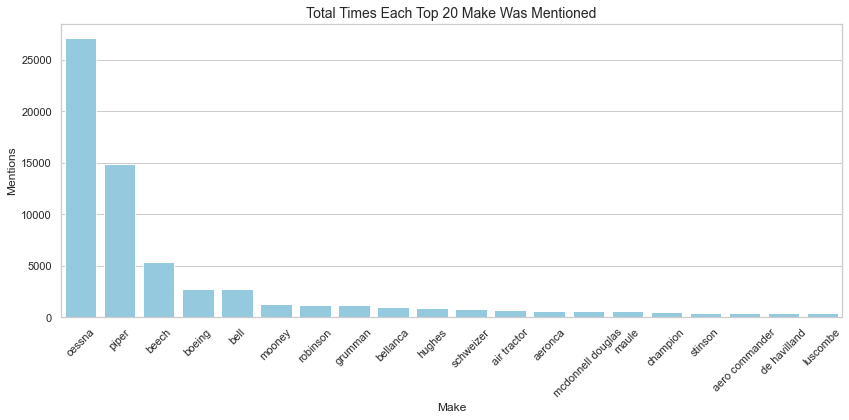

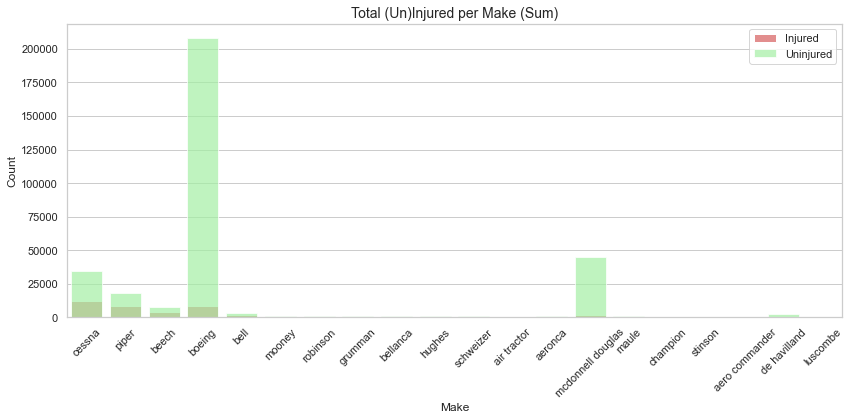

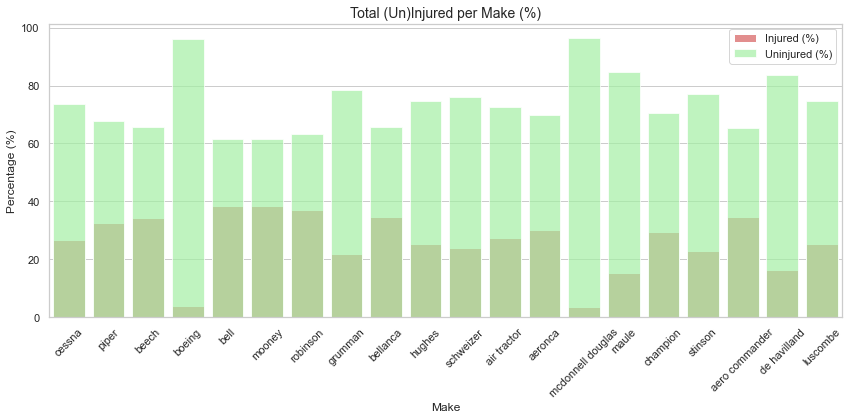

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Graph 1: Total Times Each Make Was Mentioned
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Total_Uses', color='skyblue')
plt.title('Total Times Each Top 20 Make Was Mentioned', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Mentions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Graph 2: Total Injured vs Uninjured (Sum)
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Total_Injured', color='lightcoral', label='Injured')
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Total_Uninjured', color='palegreen', alpha=0.7, label='Uninjured')
plt.title('Total (Un)Injured per Make (Sum)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Graph 3: Injured vs Uninjured Percentage
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Injured Percentage (%)', color='lightcoral', label='Injured (%)')
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Non-injured Percentage (%)', color='palegreen', alpha=0.7, label='Uninjured (%)')
plt.title('Total (Un)Injured per Make (%)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()





### Broad.Phase.of.Flight

In [ ]:
# Group by 'Broad.phase.of.flight' and calculate required statistics
Phase_summary = Aviation_df.groupby('Broad.phase.of.flight').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Times=('Broad.phase.of.flight', 'size')
)

# Calculate Injured and Non-injured Percentages
Phase_summary['Injured Percentage (%)'] = Phase_summary['Total_Injured'] / Phase_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1) * 100
Phase_summary['Non-injured Percentage (%)'] = Phase_summary['Total_Uninjured'] / Phase_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1) * 100

# Sort by 'Total_Times' and display top 10 results
sorted_Phase_summary = Phase_summary.sort_values('Total_Times', ascending=False).head(10)

sorted_Phase_summary


,Total_Injured,Total_Uninjured,Total_Times,Injured Percentage (%),Non-injured Percentage (%)
Broad.phase.of.flight,,,,,
Landing,1437.0,48533.0,15428,2.875725,97.124275
Takeoff,6010.0,45083.0,12493,11.762864,88.237136
Cruise,6836.0,45757.0,10269,12.997927,87.002073
Maneuvering,5836.0,5447.0,8144,51.723832,48.276168
Approach,4865.0,21538.0,6546,18.425936,81.574064
Climb,2025.0,19508.0,2034,9.404170,90.595830
Taxi,182.0,38277.0,1958,0.473231,99.526769
Descent,1168.0,18958.0,1887,5.803438,94.196562
Go-around,802.0,2045.0,1353,28.170004,71.829996


##### **ANALYSIS:** It looks like from the data set, most of the injuries happen to occur during the 'Maneuvering' phase of flight. However, the question we should ask ourselves is, what may be a major contrinutor to the lack of Maneuvering during these flights.


### Injury.Severity

In [208]:
# Group by 'Make' and calculate all required statistics in one step
Severity_summary = Aviation_df.groupby('Injury.Severity').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Moments=('Injury.Severity', 'size')  # Count occurrences of each model
)

# Add percentage columns for injuries and non-injuries
Severity_summary['Injured Percentage (%)'] = (
    Severity_summary['Total_Injured'] / 
    (Severity_summary['Total_Injured'] + Severity_summary['Total_Uninjured']) * 100
)
Severity_summary['Non-injured Percentage (%)'] = (
    Severity_summary['Total_Uninjured'] / 
    (Severity_summary['Total_Injured'] + Severity_summary['Total_Uninjured']) * 100
)

# Sort by 'Total_Moments' for the most frequently used models
sorted_Severity_summary = Severity_summary.sort_values(by='Total_Moments', ascending=False)

# Display the summary
print("Portion of Injured vs Non-Injured by Injury Severity:")
sorted_Severity_summary.head(10)

Portion of Injured vs Non-Injured by Injury Severity:


,Total_Injured,Total_Uninjured,Total_Moments,Injured Percentage (%),Non-injured Percentage (%)
Injury.Severity,,,,,
Non-Fatal,14114.0,307135.0,67357,4.393477,95.606523
Fatal(1),6477.0,3858.0,6167,62.670537,37.329463
Fatal,15556.0,1428.0,5262,91.592087,8.407913
Fatal(2),6420.0,889.0,3711,87.836913,12.163087
Incident,18.0,124696.0,2219,0.014433,99.985567
Fatal(3),2927.0,35.0,1147,98.818366,1.181634
Fatal(4),2765.0,208.0,812,93.003700,6.996300
Fatal(5),944.0,1.0,235,99.894180,0.105820
Minor,302.0,452.0,218,40.053050,59.946950


In [ ]:
pivot_table = pd.pivot_table(
    Aviation_df,
    index='Model',     # Rows
    columns='Injury.Severity',           # Columns
    aggfunc='count',           # Aggregation function (count occurrences)
    values='Total.injured',        # The column to aggregate
    fill_value=0               # Fill missing values with 0
)

pivot_table.head(20).sort_values(by = 'Model', ascending= False)

Injury.Severity,Fatal,Fatal(1),Fatal(10),Fatal(102),Fatal(104),Fatal(107),Fatal(11),Fatal(110),Fatal(111),Fatal(113),...,Fatal(89),Fatal(9),Fatal(92),Fatal(96),Fatal(97),Incident,Minor,Non-Fatal,Serious,Unavailable
Model,,,,,,,,,,,,,,,,,,,,,
1-11/204/AF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1-11-204AF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1 AARDEMA RAG WNG SP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,0
084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
058B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
01,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
001,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### FAR.Description

In [203]:
# Group by 'Model' and calculate all required statistics in one step
FAR_summary = Aviation_df.groupby('FAR.Description').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Uses=('FAR.Description', 'size')  # Count occurrences of each model
)

# Add percentage columns for injuries and non-injuries
FAR_summary['Injured Percentage (%)'] = (
    FAR_summary['Total_Injured'] / 
    (FAR_summary['Total_Injured'] + FAR_summary['Total_Uninjured']) * 100
)
FAR_summary['Non-injured Percentage (%)'] = (
    FAR_summary['Total_Uninjured'] / 
    (FAR_summary['Total_Injured'] + FAR_summary['Total_Uninjured']) * 100
)

# Sort by 'Total_Uses' for the most frequently used models
sorted_FAR_summary = FAR_summary.sort_values(by='Total_Uses', ascending=False)

# Display the summary
print("Portion of Injured vs Non-Injured by FAR Description:")
sorted_FAR_summary.head(10)


Portion of Injured vs Non-Injured by FAR Description:


,Total_Injured,Total_Uninjured,Total_Uses,Injured Percentage (%),Non-injured Percentage (%)
FAR.Description,,,,,
091,10191.0,19713.0,18221,34.079053,65.920947
Part 91: General Aviation,2042.0,8237.0,6486,19.865746,80.134254
NUSN,2468.0,1461.0,1584,62.814966,37.185034
NUSC,4959.0,31933.0,1013,13.441939,86.558061
137,318.0,590.0,1010,35.022026,64.977974
135,680.0,2455.0,746,21.690590,78.309410
121,845.0,64254.0,679,1.298023,98.701977
Part 137: Agricultural,61.0,307.0,437,16.576087,83.423913
UNK,575.0,1690.0,371,25.386313,74.613687


### Purpose.of.Flight

In [261]:
# Group by 'Make' and calculate all required statistics in one step
Purpose_summary = Aviation_df.groupby('Purpose.of.flight').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Times=('Purpose.of.flight', 'size')  # Count occurrences of each model
)

# Add percentage columns for injuries and non-injuries
Purpose_summary['Injured Percentage (%)'] = (
    Purpose_summary['Total_Injured'] / 
    (Purpose_summary['Total_Injured'] + Purpose_summary['Total_Uninjured']) * 100
)
Purpose_summary['Non-injured Percentage (%)'] = (
    Purpose_summary['Total_Uninjured'] / 
    (Purpose_summary['Total_Injured'] + Purpose_summary['Total_Uninjured']) * 100
)

# Sort by 'Total_Times' for the most frequently used models
sorted_Purpose_summary = Purpose_summary.sort_values(by='Total_Times', ascending=False)

# Display the summary
print("Portion of Injured vs Non-Injured by Weather.Condition:")
sorted_Purpose_summary.head(10)

Portion of Injured vs Non-Injured by Weather.Condition:


,Total_Injured,Total_Uninjured,Total_Times,Injured Percentage (%),Non-injured Percentage (%)
Purpose.of.flight,,,,,
Personal,25388.0,52052.0,49448,32.784091,67.215909
Instructional,2891.0,12580.0,10601,18.686575,81.313425
Unknown,11445.0,166487.0,6802,6.432233,93.567767
Aerial Application,997.0,2944.0,4712,25.298148,74.701852
Business,2857.0,6471.0,4018,30.628216,69.371784
Positioning,683.0,2122.0,1646,24.349376,75.650624
Other Work Use,749.0,1878.0,1264,28.511610,71.488390
Ferry,302.0,634.0,812,32.264957,67.735043
Aerial Observation,646.0,912.0,794,41.463415,58.536585


### Weather.Conditions

In [218]:
# Group by 'Weather.Condition' and calculate required statistics
Weather_summary = Aviation_df.groupby('Weather.Condition').agg(
    Total_Injured=('Total.injured', 'mean'),
    Total_Uninjured=('Total.Uninjured', 'mean'),
    Total_Times=('Weather.Condition', 'size')
)

# Calculate Injured and Non-injured Percentages
Weather_summary[['Injured Percentage (%)', 'Non-injured Percentage (%)']] = (
    Weather_summary[['Total_Injured', 'Total_Uninjured']]
    .div(Weather_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1), axis=0) * 100
)

# Sort by 'Total_Times' and display top 10 results
Weather_summary.sort_values('Total_Times', ascending=False).head(10)


,Total_Injured,Total_Uninjured,Total_Times,Injured Percentage (%),Non-injured Percentage (%)
Weather.Condition,,,,,
VMC,0.564169,4.185503,77303,11.878070,88.121930
IMC,2.269246,7.530171,5976,23.156950,76.843050
UNK,3.109141,13.122293,856,19.155058,80.844942
Unk,1.744275,26.874046,262,6.094959,93.905041


1. Which Model may be best and worst for Weather Purposes

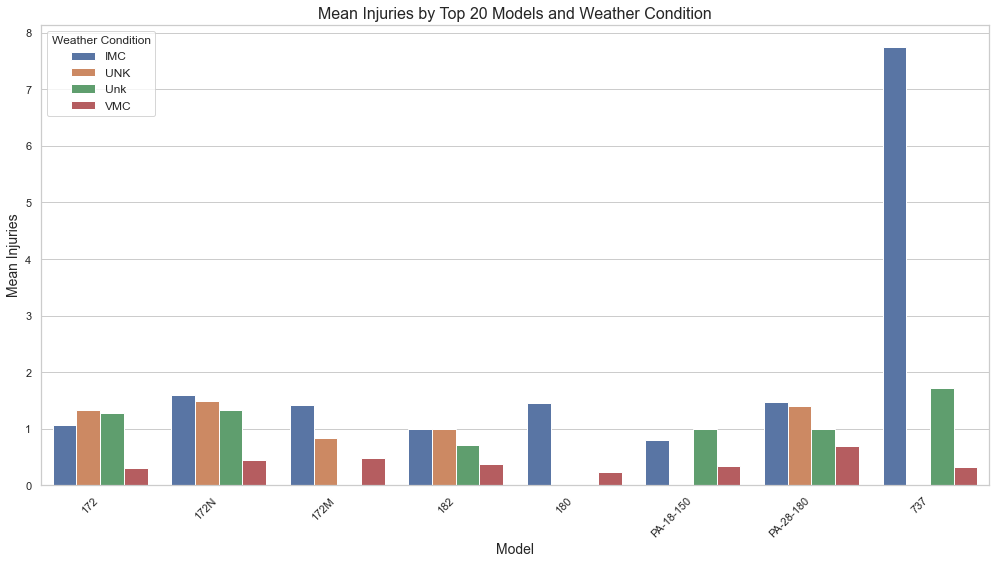

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure indices match by taking intersection
common_models = top_20_models.index.intersection(pivot_table.index)

# Filter pivot table for matching models
top_20_pivot = pivot_table.loc[common_models]

# Melt the data for Seaborn
melted_data = top_20_pivot.reset_index().melt(
    id_vars='Model', 
    var_name='Weather Condition', 
    value_name='Mean Injuries'
)

# Plot using Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Model', 
    y='Mean Injuries', 
    hue='Weather Condition', 
    data=melted_data
)

# Add titles and labels
plt.title('Mean Injuries by Top 20 Models and Weather Condition', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Injuries', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Weather Condition', fontsize=12)
plt.tight_layout()

plt.show()




In [257]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    x= Aviation_df['Weather.Condition'],
    y= Aviation_df['Model'],
)
plt.show()



TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 864x432 with 0 Axes>

In [ ]:
# Create a pivot table for mean average of Total.Uninjuries by Model per Weather.Condition
pivot_table2 = Aviation_df.pivot_table(
    values='Total.Uninjured', 
    index= 'Model', 
    columns='Weather.Condition',
    aggfunc='mean'
).dropna()

# Display the pivot table
pivot_table2.head(20)

Weather.Condition,IMC,UNK,Unk,VMC
Model,,,,
172,0.640625,0.166667,0.000000,1.404283
172M,0.244444,1.333333,1.000000,1.543103
172N,0.291667,0.800000,0.000000,1.318681
175,0.375000,0.000000,0.000000,1.306569
177B,0.250000,0.000000,0.000000,1.409091
180,0.650000,3.000000,2.000000,1.677586
182,1.000000,1.333333,1.000000,1.439926
206,0.263158,0.714286,0.250000,1.868914
207,1.259259,0.000000,0.000000,2.178295


In [214]:
import itertools
import pandas as pd
import numpy as np


# Create the pivot table with aggregation
pivot_table = pd.pivot_table(Aviation_df, index='Broad.phase.of.flight', columns='Weather.Condition', aggfunc='mean', values='Total.injured')

# Display the pivot table
pivot_table



Weather.Condition,IMC,UNK,VMC
Broad.phase.of.flight,,,
Approach,2.455808,1.562500,0.651976
Climb,1.771552,1.571429,1.133429
Cruise,1.630435,1.841346,0.626174
Descent,1.535912,1.388889,0.665385
Go-around,2.215385,0.333333,0.546326
Landing,0.450151,0.192308,0.112105
Maneuvering,1.759669,1.459016,0.835513
Other,1.000000,0.500000,0.923913
Standing,0.950000,0.117647,0.471669


1. Best Model to use during this Weather Condition?
2. Best Model to use based on  of Flight?
